## User Demographics Analysis

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

In [63]:
data = pd.read_csv("user-demographics.csv")
data


,Town/City,Country,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count
0,Hyderabad,India,75090,71123,81835,0.560468,1.089826,132.499694,758313
1,Bengaluru,India,74325,72162,84798,0.536459,1.140908,138.728988,776356
2,Chennai,India,54031,51207,55398,0.576372,1.025300,120.585664,511249
3,Mumbai,India,48323,45147,43751,0.483714,0.905387,103.302547,422074
4,Pune,India,44515,41678,45887,0.531401,1.030821,119.913759,420101
...,...,...,...,...,...,...,...,...,...
4995,Chestermere,Canada,12,11,8,0.615385,0.666667,16.083333,61
4996,Chilpancingo,Mexico,12,12,2,0.133333,0.166667,3.250000,45
4997,Chokio,United States,12,9,5,0.333333,0.416667,18.916667,50
4998,Chorley,United Kingdom,12,12,11,0.785714,0.916667,239.500000,57


In [64]:
print(data)

         Town/City         Country  Users  New users  Engaged sessions  \
0        Hyderabad           India  75090      71123             81835   
1        Bengaluru           India  74325      72162             84798   
2          Chennai           India  54031      51207             55398   
3           Mumbai           India  48323      45147             43751   
4             Pune           India  44515      41678             45887   
...            ...             ...    ...        ...               ...   
4995   Chestermere          Canada     12         11                 8   
4996  Chilpancingo          Mexico     12         12                 2   
4997        Chokio   United States     12          9                 5   
4998       Chorley  United Kingdom     12         12                11   
4999       Chorzow          Poland     12         12                 9   

      Engagement rate  Engaged sessions per user  Average engagement time  \
0            0.560468             

In [65]:
# data size
data.shape

(5000, 9)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Town/City                  5000 non-null   object 
 1   Country                    5000 non-null   object 
 2   Users                      5000 non-null   int64  
 3   New users                  5000 non-null   int64  
 4   Engaged sessions           5000 non-null   int64  
 5   Engagement rate            5000 non-null   float64
 6   Engaged sessions per user  5000 non-null   float64
 7   Average engagement time    5000 non-null   float64
 8   Event count                5000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 351.7+ KB


In [67]:
data.describe()

,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,258.603400,239.222400,244.537000,0.523479,0.853167,101.298684,2276.547400
std,2188.601568,2066.505792,2296.886373,0.121147,0.406458,173.481918,21224.330334
min,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,36.000000
25%,19.000000,17.000000,15.000000,0.450525,0.670073,47.175600,128.000000
50%,33.000000,29.000000,28.000000,0.525000,0.823529,77.371173,250.000000
75%,84.000000,77.000000,73.000000,0.600000,0.983146,119.423881,689.250000
max,75090.000000,72162.000000,84798.000000,1.000000,13.294118,6895.550000,776356.000000


In [68]:
## checking for missing values
missing_values = data.isnull().sum()
missing_values

Town/City                    0
Country                      0
Users                        0
New users                    0
Engaged sessions             0
Engagement rate              0
Engaged sessions per user    0
Average engagement time      0
Event count                  0
dtype: int64

In [69]:
## checking for continous colunmns
continous_columns = data.select_dtypes(exclude="object")
continous_columns

,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count
0,75090,71123,81835,0.560468,1.089826,132.499694,758313
1,74325,72162,84798,0.536459,1.140908,138.728988,776356
2,54031,51207,55398,0.576372,1.025300,120.585664,511249
3,48323,45147,43751,0.483714,0.905387,103.302547,422074
4,44515,41678,45887,0.531401,1.030821,119.913759,420101
...,...,...,...,...,...,...,...
4995,12,11,8,0.615385,0.666667,16.083333,61
4996,12,12,2,0.133333,0.166667,3.250000,45
4997,12,9,5,0.333333,0.416667,18.916667,50
4998,12,12,11,0.785714,0.916667,239.500000,57


In [70]:
categorical_clunmns = data.select_dtypes(include="object")
categorical_clunmns


,Town/City,Country
0,Hyderabad,India
1,Bengaluru,India
2,Chennai,India
3,Mumbai,India
4,Pune,India
...,...,...
4995,Chestermere,Canada
4996,Chilpancingo,Mexico
4997,Chokio,United States
4998,Chorley,United Kingdom


In [71]:
data.describe(include="object")

,Town/City,Country
count,5000,5000
unique,4744,185
top,(not set),United States
freq,149,1363


In [72]:
data.columns

Index(['Town/City', 'Country', 'Users', 'New users', 'Engaged sessions',
       'Engagement rate', 'Engaged sessions per user',
       'Average engagement time', 'Event count'],
      dtype='object')

- visialization of cont columns

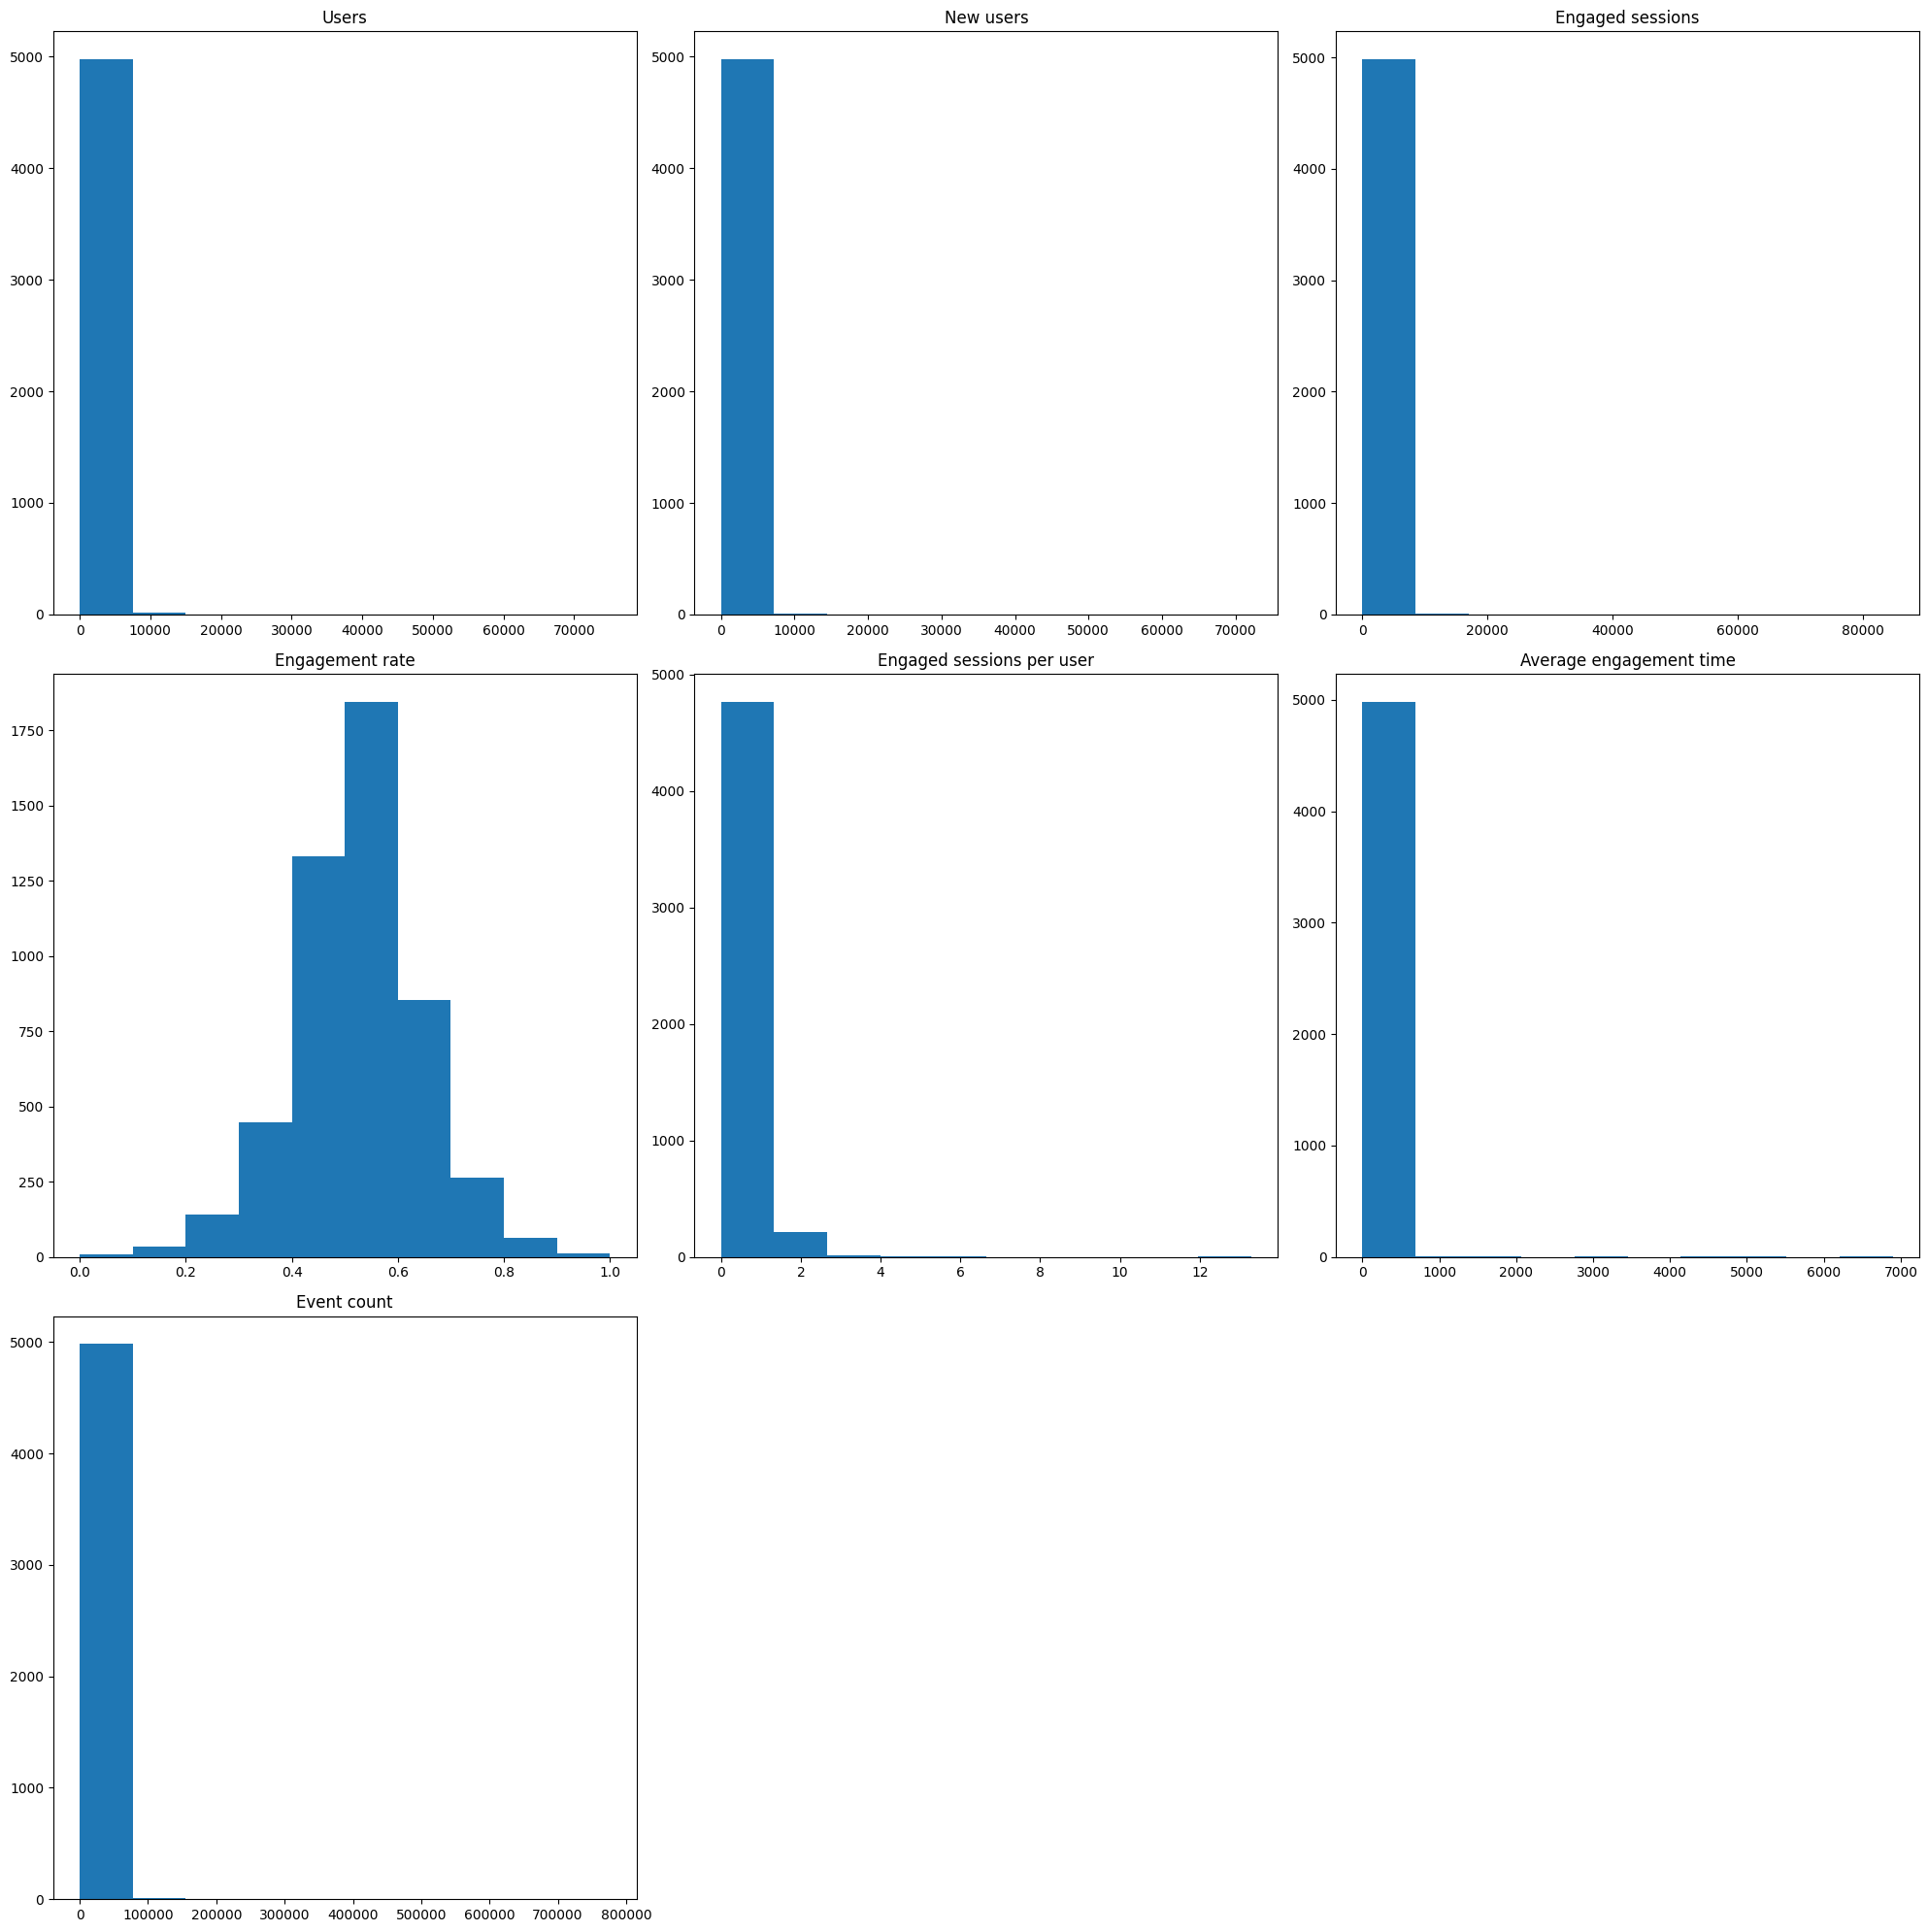

In [73]:
plt.figure(figsize=(20,20))
for i,col in enumerate(continous_columns.columns):
    plt.subplot(3,3, i+1)
    plt.hist(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

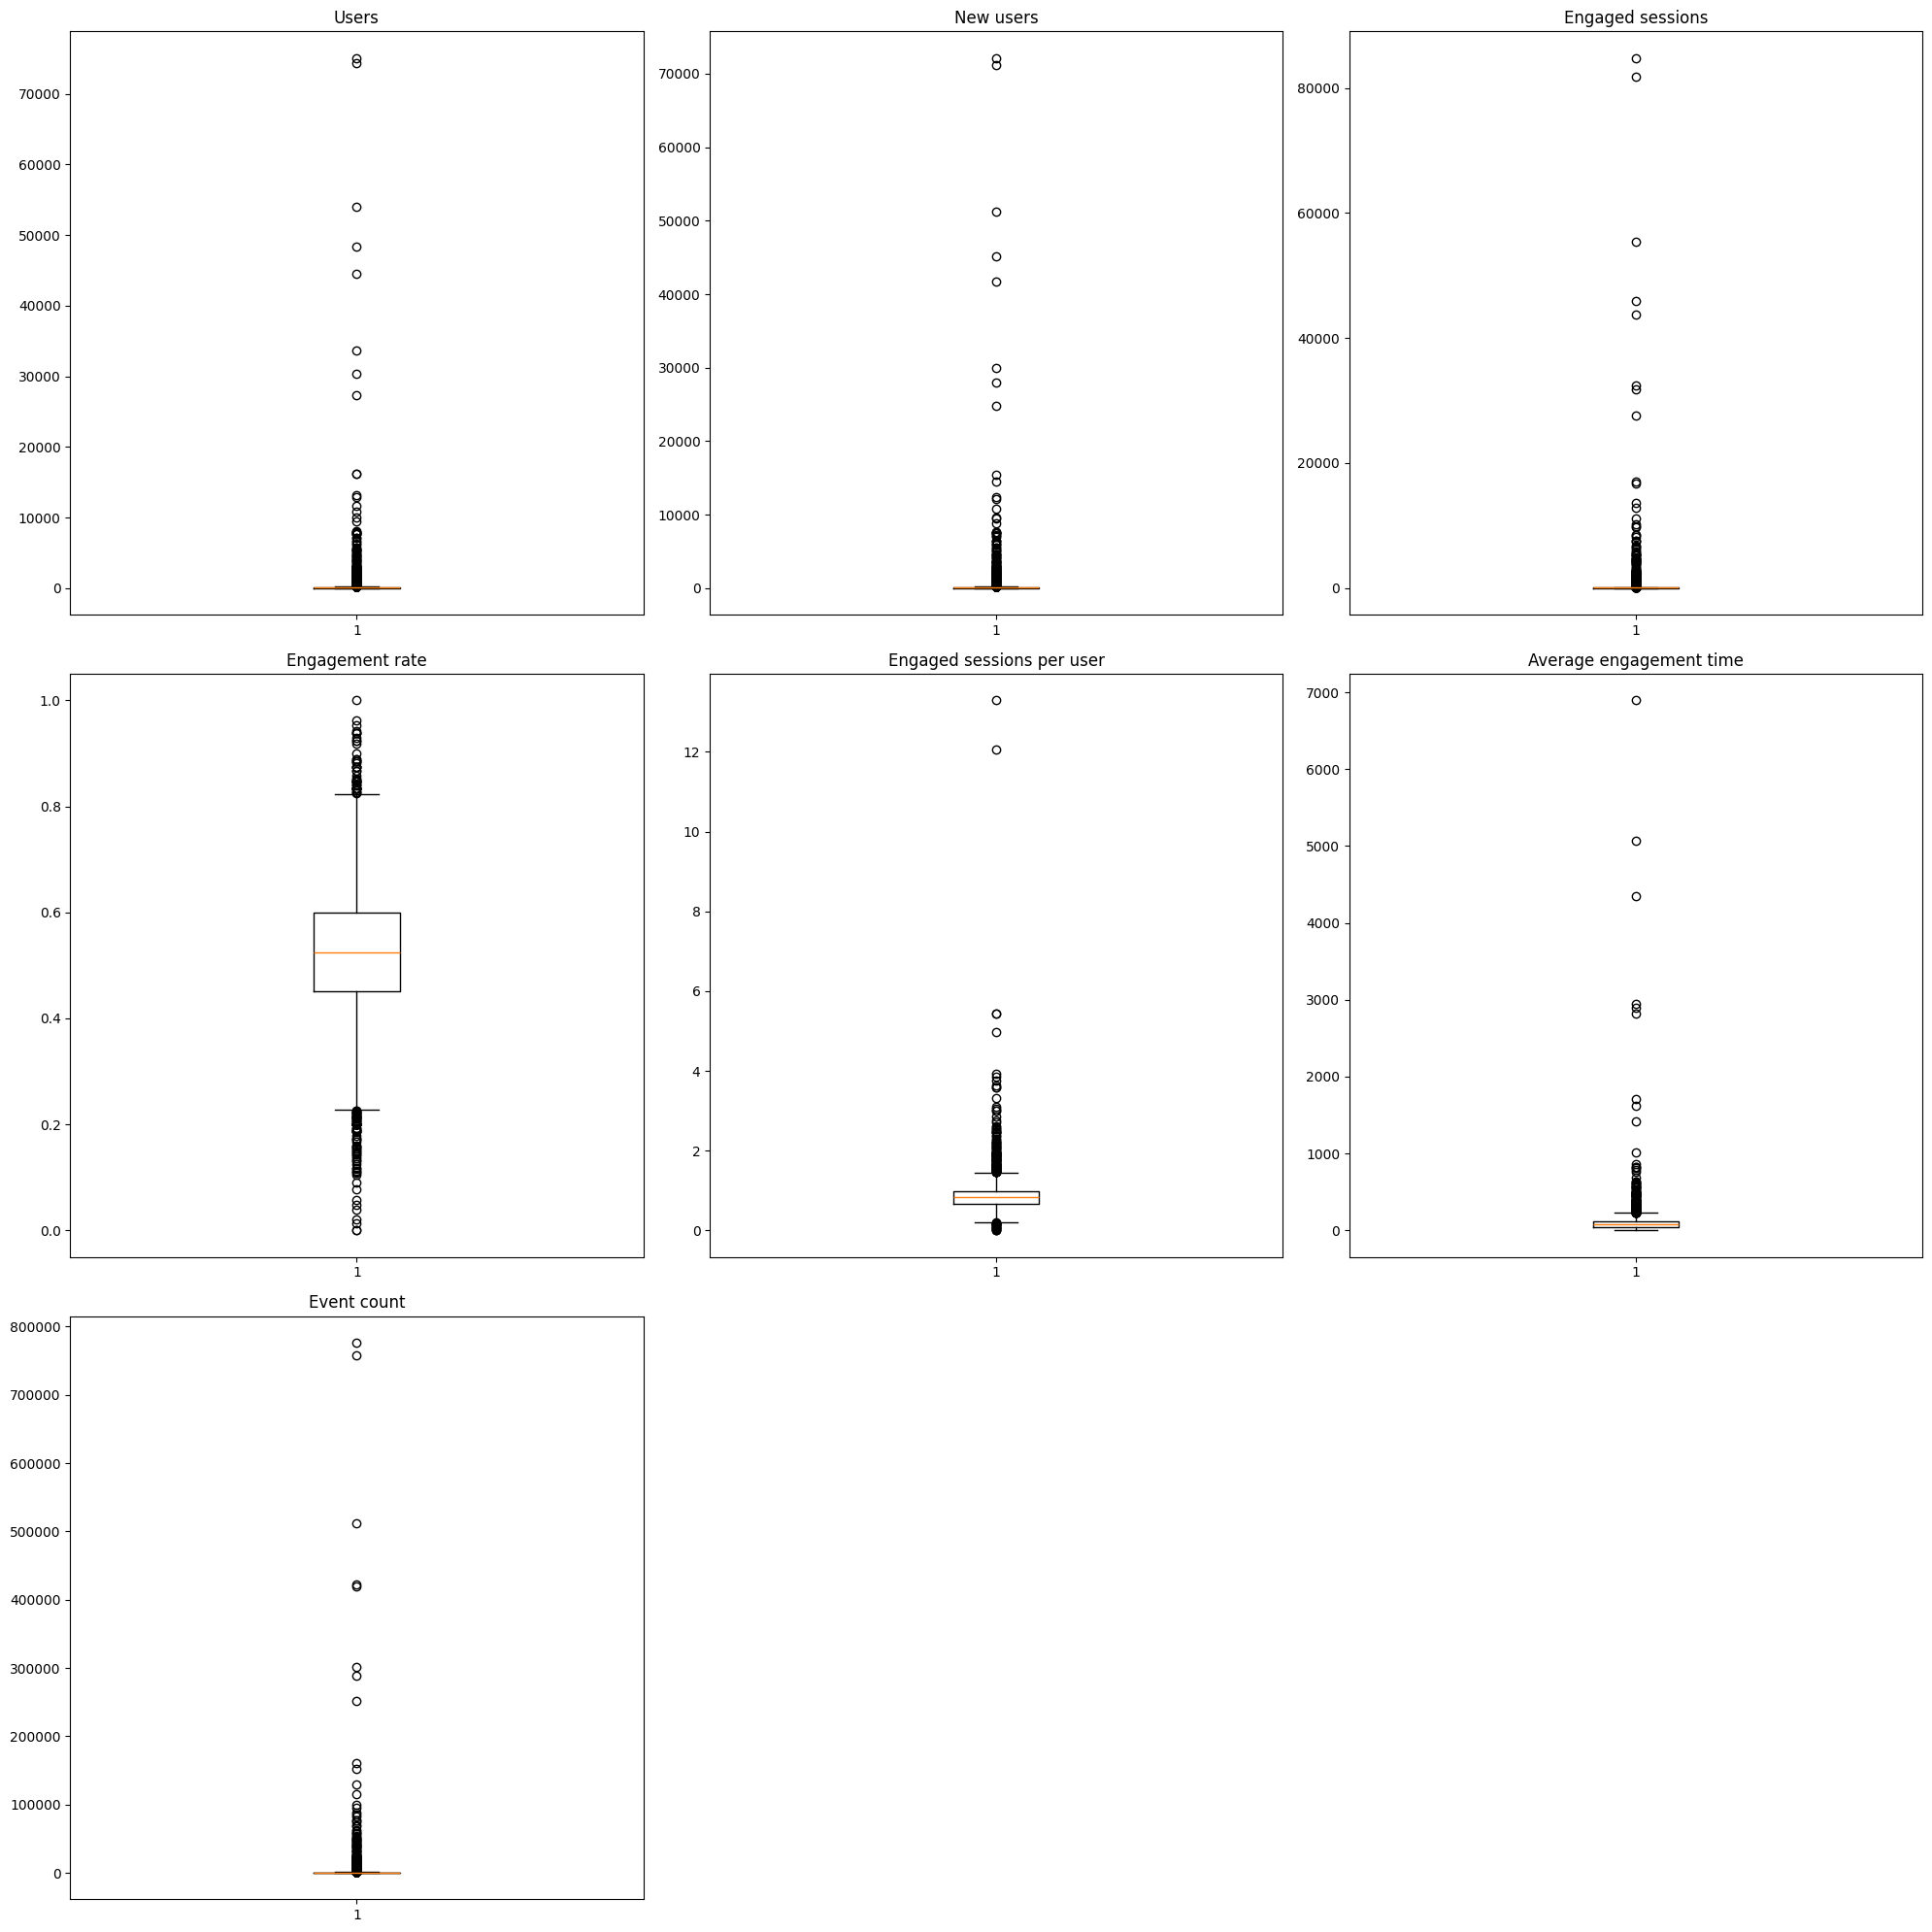

In [74]:
### checking for outliers
def box_plotting(continous_columns):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(continous_columns.columns):
        plt.subplot(3,3, i+1)
        plt.boxplot(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

box_plotting(continous_columns)
        

In [75]:
data.describe()

,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,258.603400,239.222400,244.537000,0.523479,0.853167,101.298684,2276.547400
std,2188.601568,2066.505792,2296.886373,0.121147,0.406458,173.481918,21224.330334
min,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,36.000000
25%,19.000000,17.000000,15.000000,0.450525,0.670073,47.175600,128.000000
50%,33.000000,29.000000,28.000000,0.525000,0.823529,77.371173,250.000000
75%,84.000000,77.000000,73.000000,0.600000,0.983146,119.423881,689.250000
max,75090.000000,72162.000000,84798.000000,1.000000,13.294118,6895.550000,776356.000000


In [76]:
print(data.describe())

              Users     New users  Engaged sessions  Engagement rate  \
count   5000.000000   5000.000000       5000.000000      5000.000000   
mean     258.603400    239.222400        244.537000         0.523479   
std     2188.601568   2066.505792       2296.886373         0.121147   
min       12.000000      5.000000          0.000000         0.000000   
25%       19.000000     17.000000         15.000000         0.450525   
50%       33.000000     29.000000         28.000000         0.525000   
75%       84.000000     77.000000         73.000000         0.600000   
max    75090.000000  72162.000000      84798.000000         1.000000   

       Engaged sessions per user  Average engagement time    Event count  
count                5000.000000              5000.000000    5000.000000  
mean                    0.853167               101.298684    2276.547400  
std                     0.406458               173.481918   21224.330334  
min                     0.000000                 0.

### Observations from the summary statistics:

- The number of users ranges from 12 to 75,090, with a mean of 258.60. It indicates a wide variance in user counts across different cities.
- The new users range from 5 to 72,162, with an average of 239.22. Similar to the total users, this shows a significant variation.
- Engaged sessions range from 0 to 84,798, with an average of 244.54. The zero minimum indicates some entries with no engaged sessions.
- The engagement rate ranges from 0 to 1, with an average of 0.52. This suggests moderate engagement overall.
- Engaged Sessions per User ranges from 0 to 13.29, with a mean of 0.85, showing how frequently users engage in sessions.
- The average engagement time ranges from 0 to 6,895.55 seconds, with a mean of 101.30 seconds. The high maximum indicates some very engaged users.
- Event counts range from 36 to 776,356, with an average of 2,276.55. This suggests a few cities contribute significantly to the total event count.

 #### The geographic distribution of users across different towns/cities to understand which areas have the highest user counts:

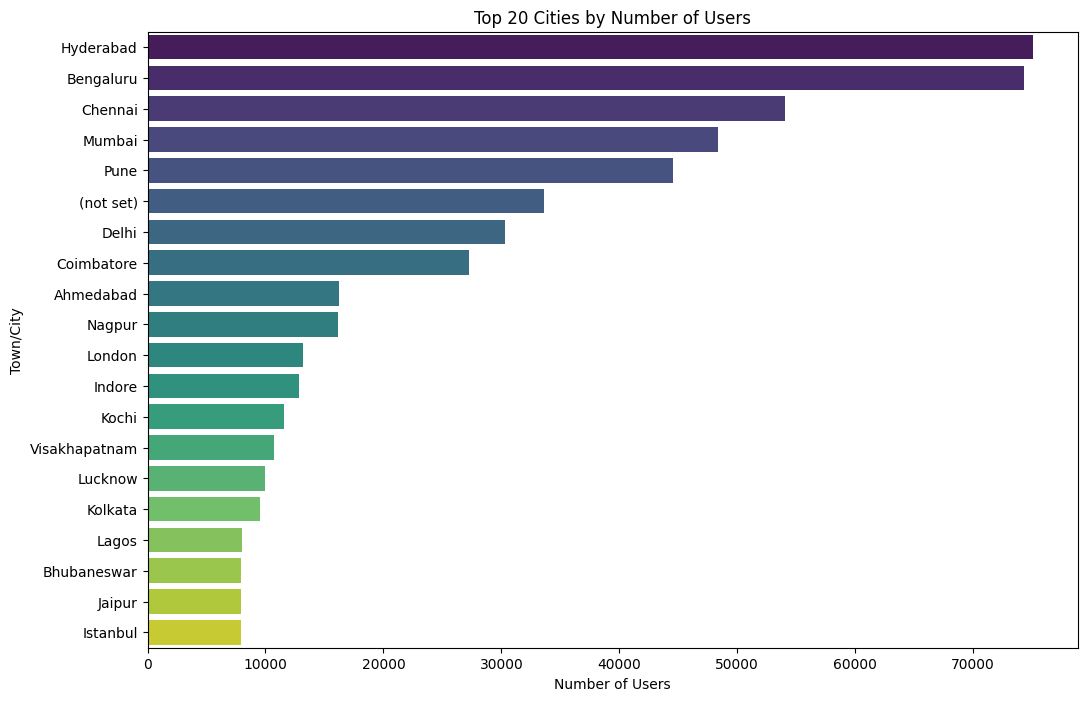

In [77]:


top_cities = data.sort_values(by='Users', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Users'], palette='viridis')
plt.xlabel('Number of Users')
plt.ylabel('Town/City')
plt.title('Top 20 Cities by Number of Users')
plt.show()

- Hyderabad, Bengaluru, and Chennai are the top three cities with the highest number of users, significantly outpacing other cities. There is a steep drop-off in user count after the top few cities, which indicates a concentration of users in major urban centres.

####  Engagement rate across the top cities:

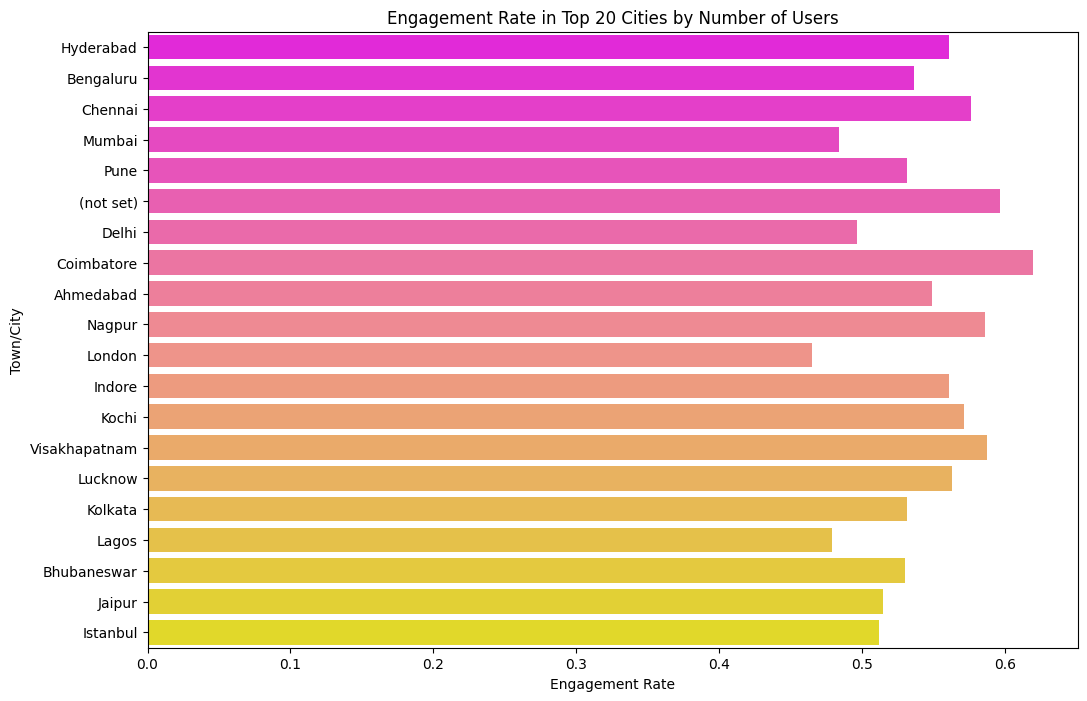

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Engagement rate'], palette='spring')
plt.xlabel('Engagement Rate')
plt.ylabel('Town/City')
plt.title('Engagement Rate in Top 20 Cities by Number of Users')
plt.show()

- Key findings indicate that Chennai, Hyderabad, and Bengaluru exhibit the highest engagement rates, suggesting that users in these cities are more actively interacting with the website’s content.

#### The average number of engaged sessions per user for the top 20 cities:

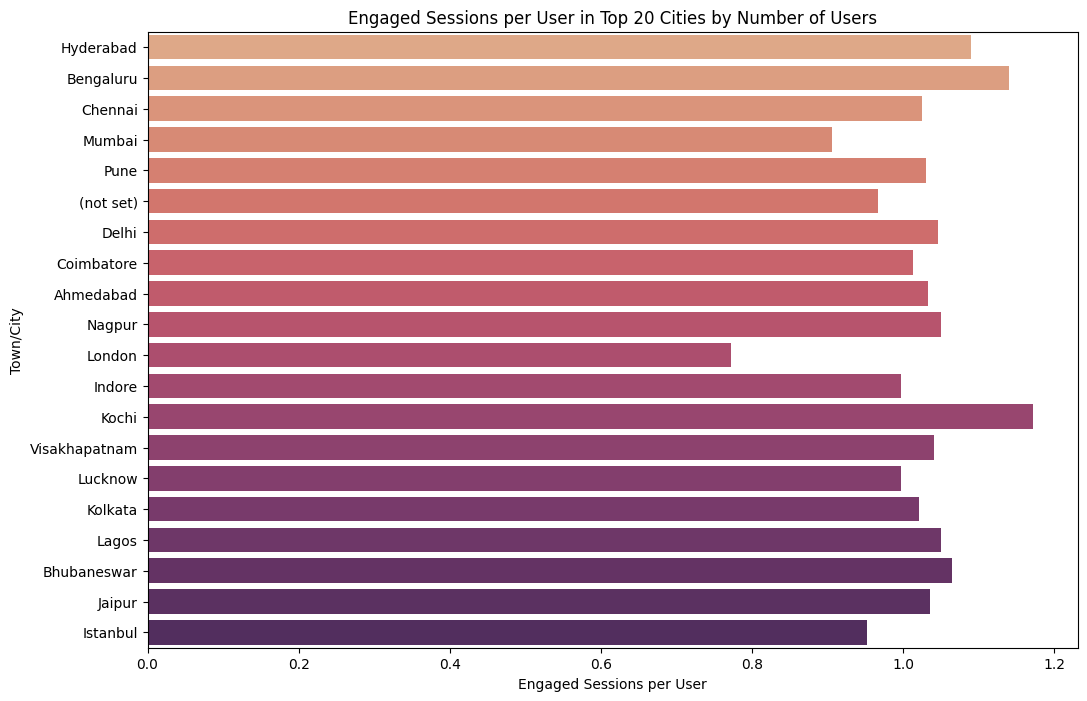

In [79]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Engaged sessions per user'], palette='flare')
plt.xlabel('Engaged Sessions per User')
plt.ylabel('Town/City')
plt.title('Engaged Sessions per User in Top 20 Cities by Number of Users')
plt.show()

- Key findings indicate that Bengaluru and Hyderabad have the highest engaged sessions per user, suggesting that users in these cities interact frequently with the website.

#### The average engagement time for the top 20 cities:

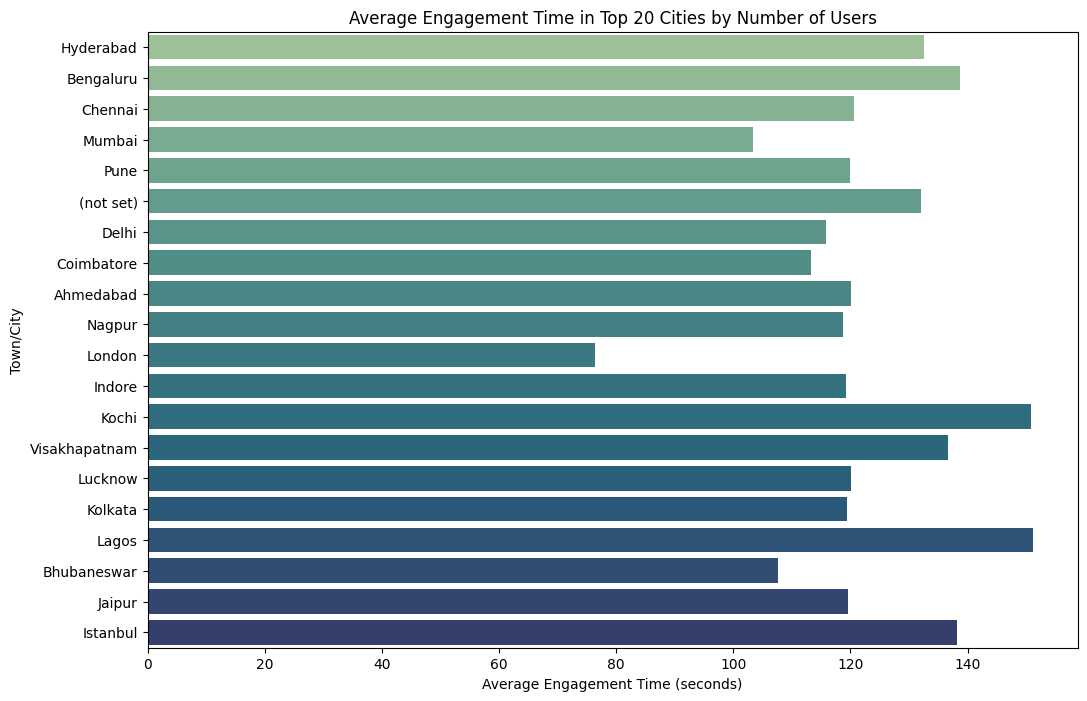

In [80]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Average engagement time'], palette='crest')
plt.xlabel('Average Engagement Time (seconds)')
plt.ylabel('Town/City')
plt.title('Average Engagement Time in Top 20 Cities by Number of Users')
plt.show()

- Key findings include Istanbul, Jaipur, and Bhubaneswar showing the highest average engagement times, indicating that users in these cities spend more time engaged on the website.

#### Compare the new vs returning users in the top 20 cities:

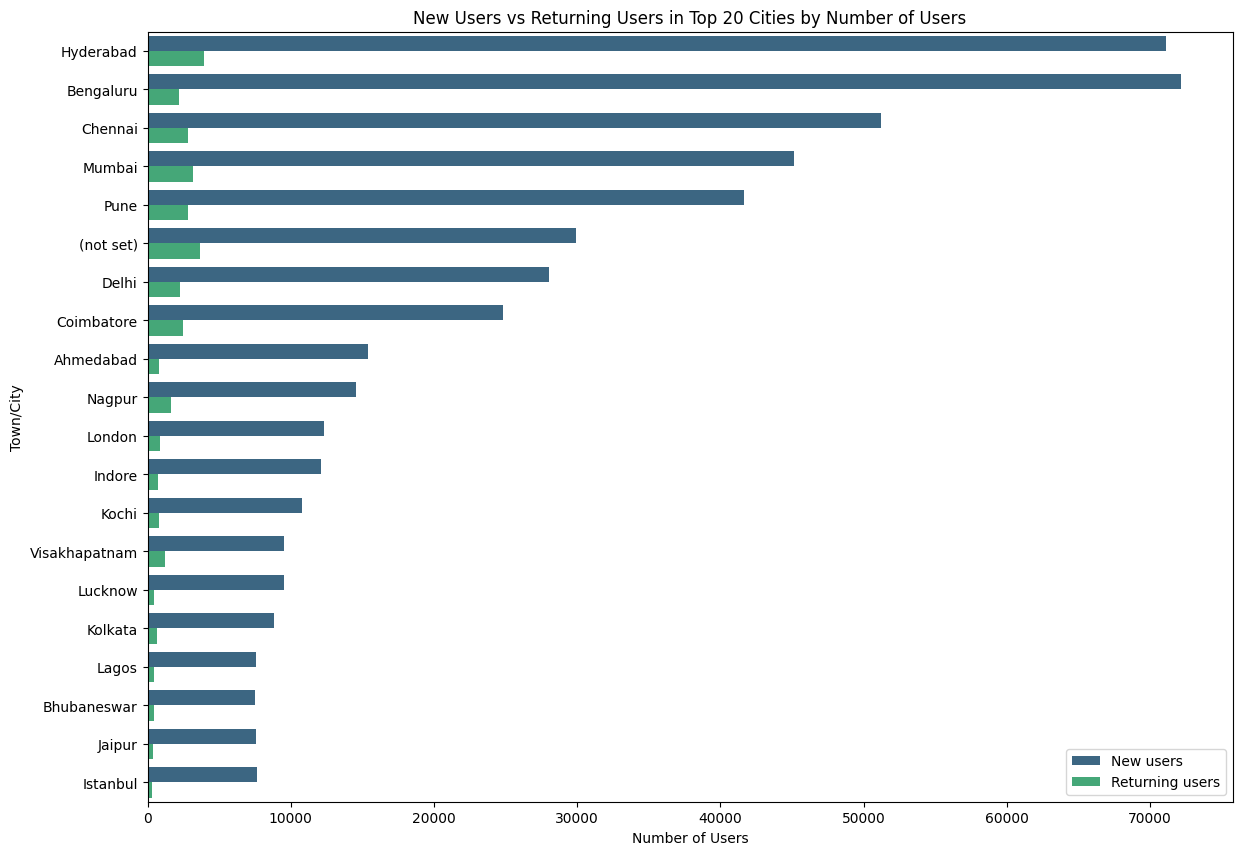

In [81]:
top_cities['Returning users'] = top_cities['Users'] - top_cities['New users']

top_cities_melted = top_cities.melt(id_vars='Town/City', value_vars=['New users', 'Returning users'],
                                    var_name='User Type', value_name='Count')

plt.figure(figsize=(14, 10))
sns.barplot(y='Town/City', x='Count', hue='User Type', data=top_cities_melted, palette='viridis')
plt.xlabel('Number of Users')
plt.ylabel('Town/City')
plt.title('New Users vs Returning Users in Top 20 Cities by Number of Users')
plt.legend()
plt.show()

- The data reveals that the majority of users in most cities are new users, with Hyderabad, Bengaluru, and Chennai having the highest counts. This suggests that these cities are experiencing significant growth in attracting first-time visitors. Conversely, the proportion of returning users is much smaller across all cities, indicating a potential area for improving user retention strategies.



#### The event counts from the top 20 cities:

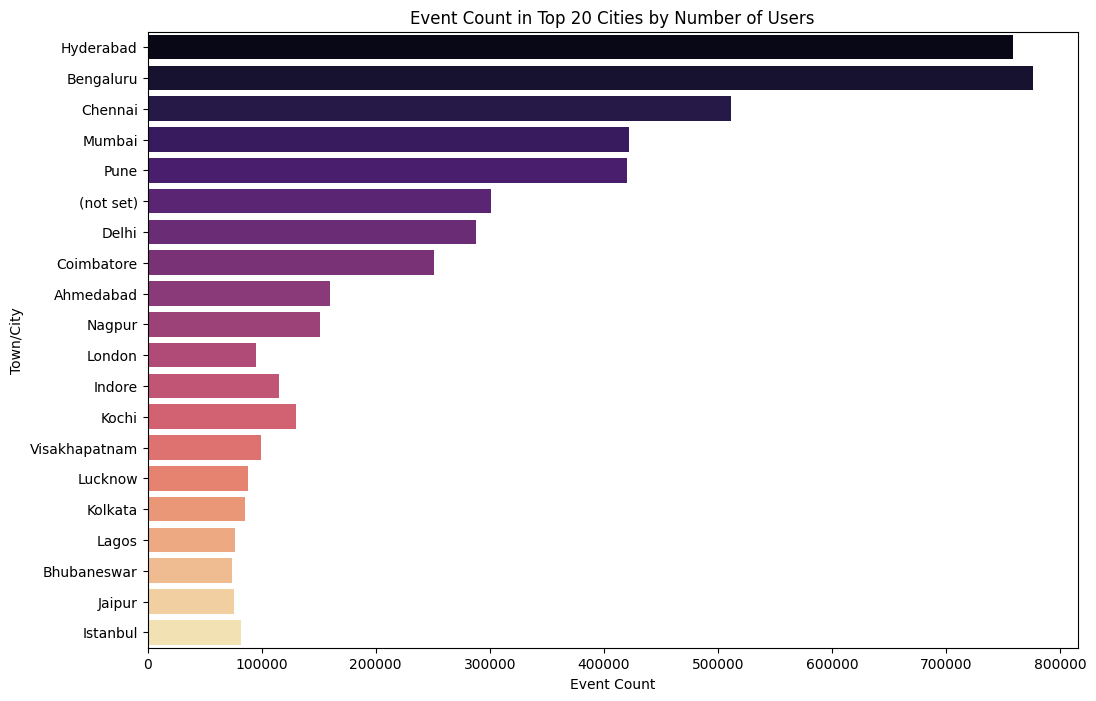

In [82]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Event count'], palette='magma')
plt.xlabel('Event Count')
plt.ylabel('Town/City')
plt.title('Event Count in Top 20 Cities by Number of Users')
plt.show()

- Hyderabad and Bengaluru lead significantly with the highest event counts, indicating a high level of user interactions in these cities. Chennai and Mumbai also exhibit substantial event counts, demonstrating active user engagement. The cities towards the lower end of the chart, such as Bhubaneswar, Jaipur, and Istanbul, have relatively lower event counts, suggesting less user interaction.




#### User Segmentation by Cities for Budget Allocation
The primary aim of demographics analysis is to find user segments for various marketing campaigns where we can allocate the budget according to the type of engagement in each segment. In our dataset, the demographic information is limited to location, so let’s create a budget allocation strategy.

To segment users effectively for targeting ads and maximizing the ad budget, we need to identify user segments that offer the highest potential for engagement and conversions. Given the dataset, we can segment users based on the following criteria:

- User Activity: High vs. low activity based on engaged sessions and average engagement time.
- User Type: New vs. returning users.
- Geographic Location: Cities with high, medium, and low user counts.


#### Creating user segments based on this strategy:

In [83]:
# high-Engagement Users
high_engagement_users = data[(data['Engaged sessions per user'] > data['Engaged sessions per user'].mean()) &
                             (data['Average engagement time'] > data['Average engagement time'].mean())]

# new Users
new_users = data[data['New users'] > (0.5 * data['Users'])]

# returning Users
returning_users = data[data['Users'] - data['New users'] > (0.5 * data['Users'])]

# categorize cities into high, medium, and low user count segments based on quantiles
user_quantiles = data['Users'].quantile([0.33, 0.67])
low_user_cities = data[data['Users'] <= user_quantiles[0.33]]
medium_user_cities = data[(data['Users'] > user_quantiles[0.33]) & (data['Users'] <= user_quantiles[0.67])]
high_user_cities = data[data['Users'] > user_quantiles[0.67]]

# summary of segments
segments_summary = {
    "High Engagement Users": len(high_engagement_users),
    "New Users": len(new_users),
    "Returning Users": len(returning_users),
    "Low User Cities": len(low_user_cities),
    "Medium User Cities": len(medium_user_cities),
    "High User Cities": len(high_user_cities)
}

segments_summary

{'High Engagement Users': 1383,
 'New Users': 4975,
 'Returning Users': 17,
 'Low User Cities': 1687,
 'Medium User Cities': 1676,
 'High User Cities': 1637}

To effectively allocate the budget using these user segments, we should focus on strategies that maximize returns by targeting specific groups. Here’s how we can approach budget allocation based on each segment:

- High Engagement Users: These users are already highly engaged, meaning they have a high likelihood of converting or purchasing. We can use a substantial portion of the budget for this segment to maintain and enhance their engagement. We can offer personalized ads, loyalty programs, and exclusive offers to this segment.
- New Users: These users represent potential growth. Effective onboarding can turn them into regular, engaged users. We can invest in welcoming campaigns, introductory offers, and onboarding programs for this segment. The focus should be on making their first experiences positive to drive retention.
- Returning Users: While the number of returning users is small, they represent loyalty and consistency. We can offer retention strategies, such as personalized recommendations and rewards for continued use to this segment of users.
- Low User Cities: These cities have untapped potential. Awareness campaigns can increase the user base. We can allocate a smaller portion of the budget to brand awareness campaigns and introductory offers to attract new users from these cities.
- Medium User Cities: These cities show moderate potential and can be nurtured to become high-user cities. We can allocate more budget to this segment in the form of targeted ads to convert them into cities with high users.
- High User Cities: These cities already have a large user base with high engagement potential. Similar to the high-engagement users, we can use a substantial portion of the budget for this segment as well to maintain and enhance their engagement.
So, this is how we can make data-driven decisions using techniques like demographics analysis for budget allocation.

### Summary
So, demographics analysis involves examining the characteristics of a population based on factors such as age, gender, location, income, education, and more. It helps businesses and organizations understand their audience, tailor marketing strategies, personalize customer experiences, and make informed decisions.

- removing outliers using IQR

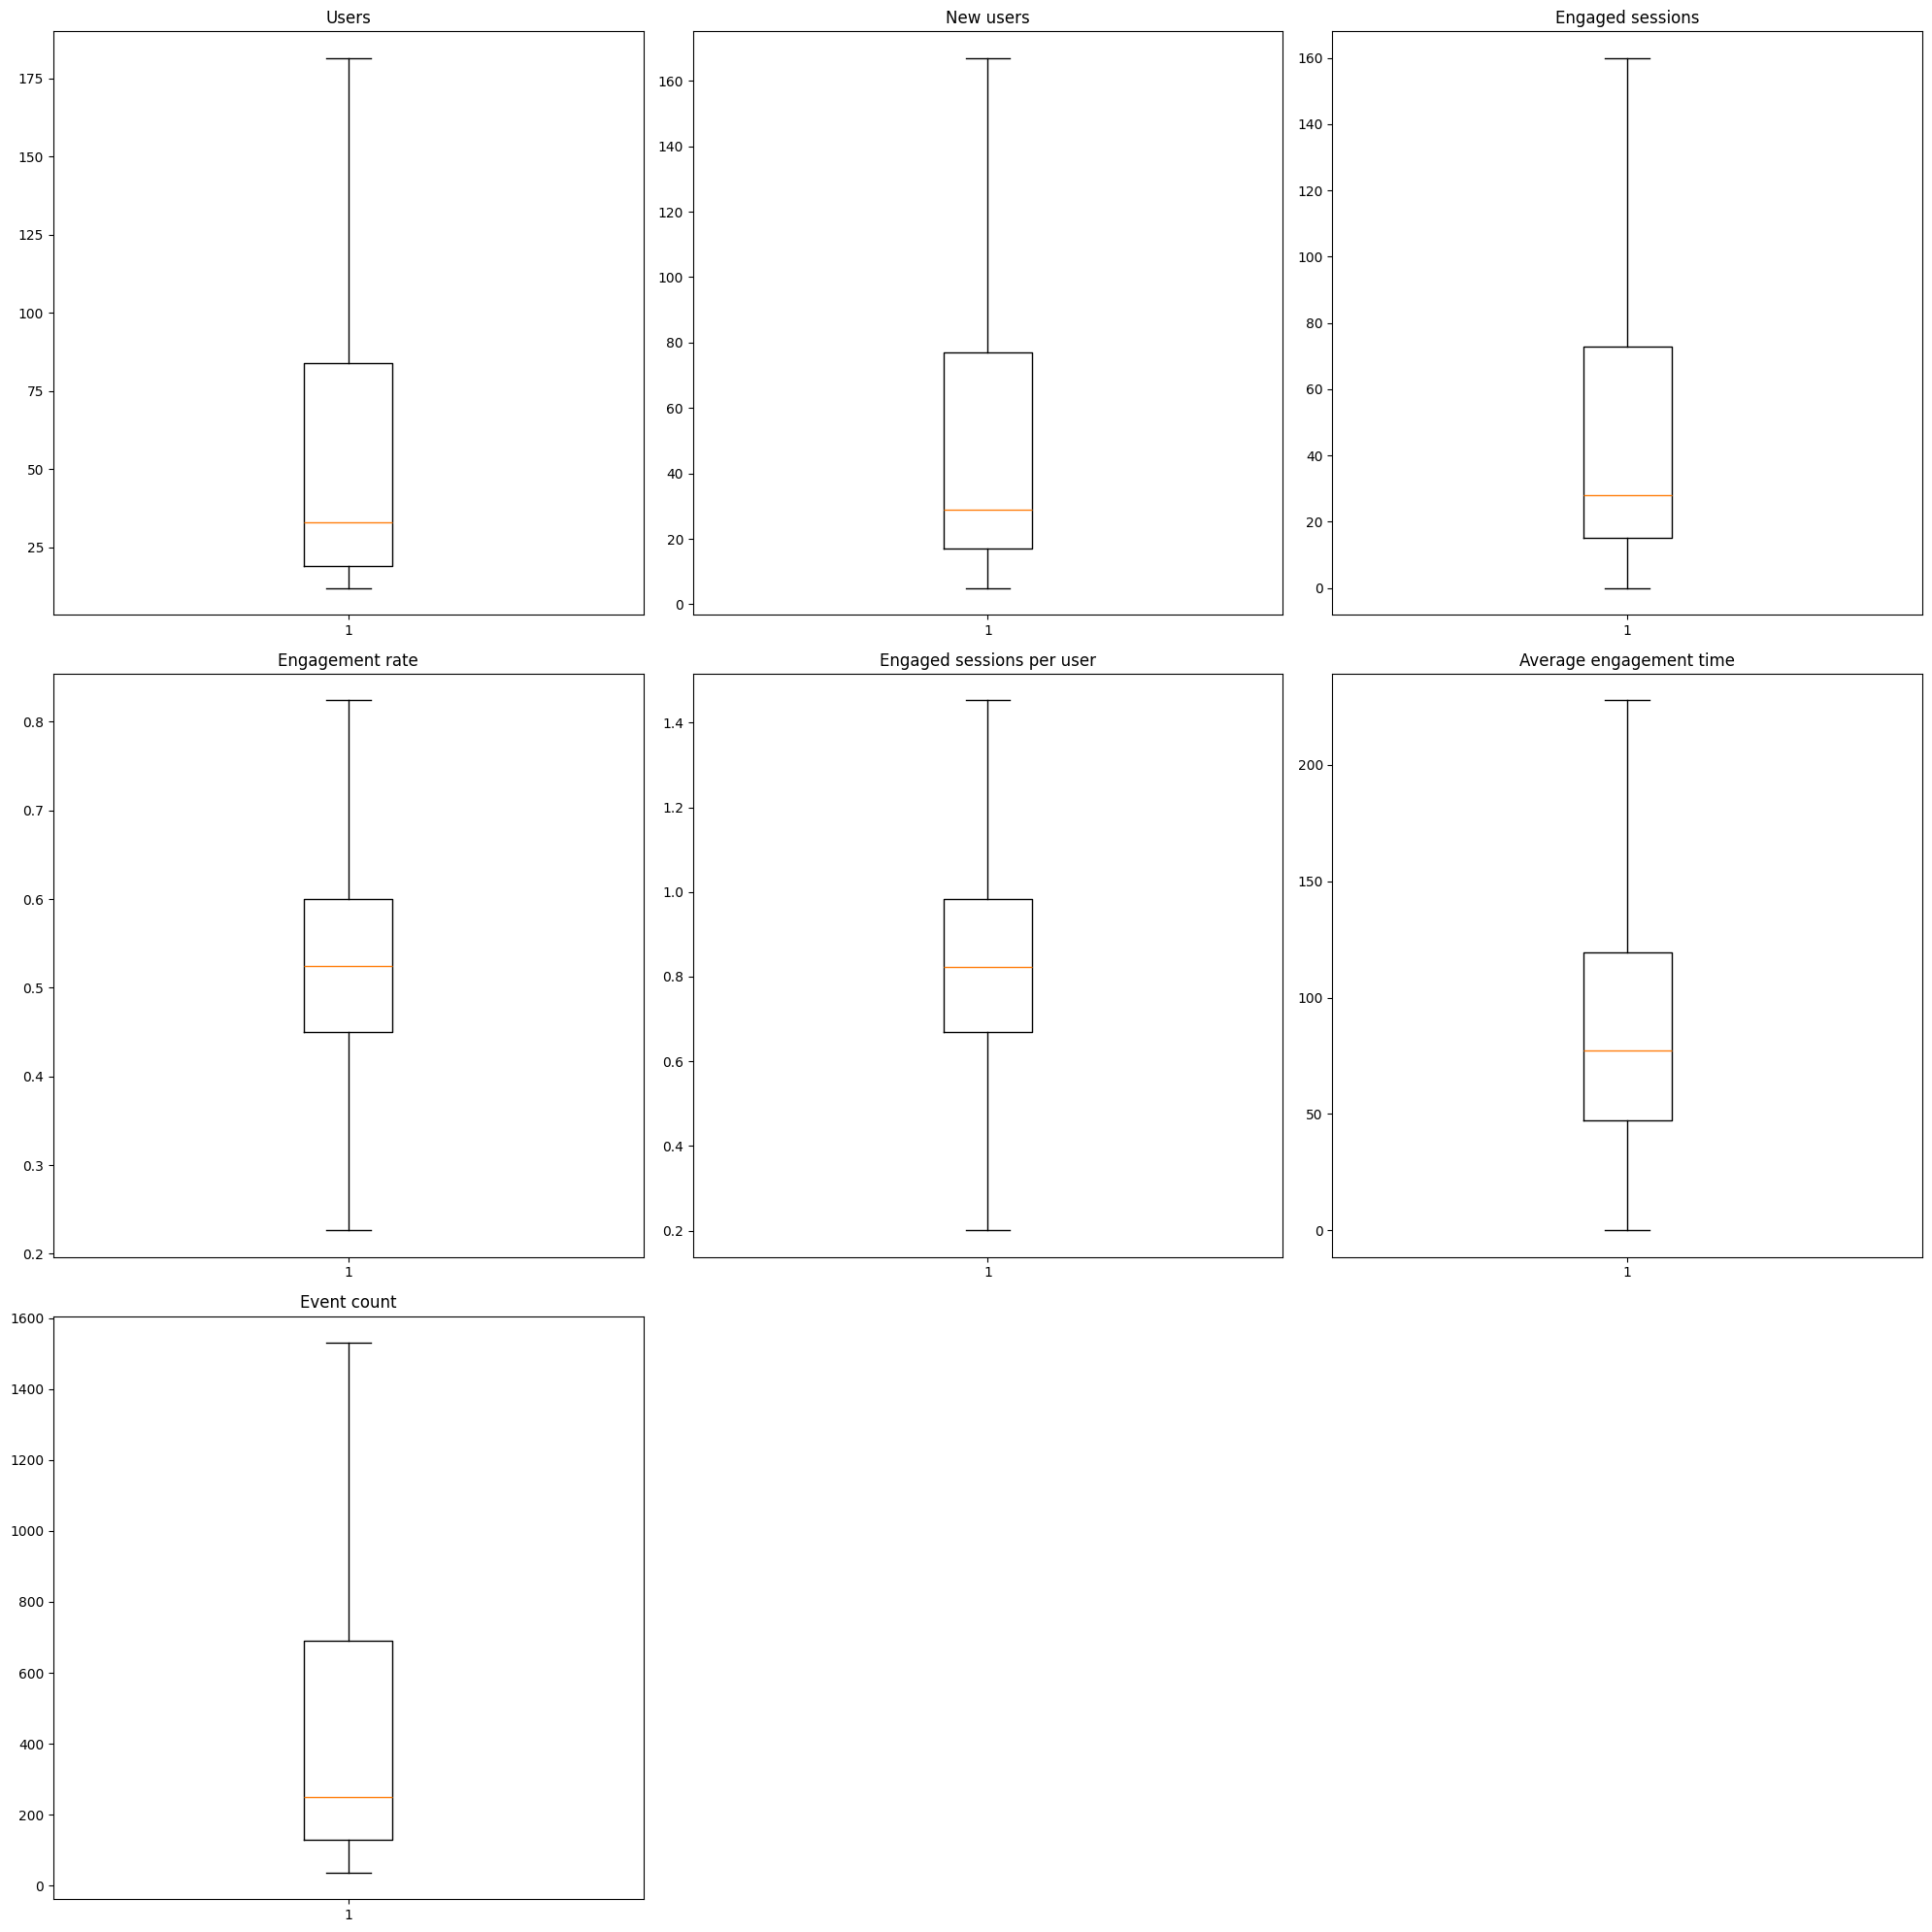

In [84]:
def removing_outliers(columns):
    for i in columns:

        lower_quantile = data[i].quantile(.25)
        upper_quantile = data[i].quantile(.75)

        IQR  = upper_quantile-lower_quantile

        upper_boundary = upper_quantile + 1.5 * IQR
        lower_boundary = lower_quantile - 1.5 * IQR

        data[i] = np.where(data[i]>upper_boundary, upper_boundary, data[i])
        data[i] = np.where(data[i]<lower_boundary, lower_boundary, data[i])



removing_outliers(continous_columns)
box_plotting(continous_columns)

#### ***©️Emmanuel Nsubuga 💫***